An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

Lead Conversion Process - Demonstrated as a funnel
Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

<b>Strategy:</b>
1. Data understanding</br>
    1.1 Loading dataset and describing them </br>
    1.2 Data Formatting </br>
    1.3 Dropping columns having higher percentage of missing values</br>
2. Data cleaning</br>
    2.1 Handling missing data</br>
    2.2 Handling outliers</br> 
    2.3 Checking for data bias </br>
    2.4 Data Imbalance Ratio (Conversion Ratio)
3. Data Analysis</br>
    3.1 Univariate Analysis</br>
    3.2 Bivariate Analysis</br>
    3.3 Multivariate Analysis</br>
4. Data Preparation </br>
    4.1 Reducing Categories for categorical variables
    4.2 Creating dummy variables
    4.3 Multicollinearity check using correlation matrix
5. Model Building and Evaluation</br>
    5.1 Train and Test Data Split</br>
    5.2 Standardization</br>
    5.3 Model Building and Prediction</br>
    5.4 Model Evaluation</br>
    5.5 Results Interpretation</br>

### 1. Data Understanding

#### 1.1 Loading dataset and describing them

In [156]:
#Importing libraries
import numpy as np
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#train and test split
from sklearn.model_selection import train_test_split

#Standardizing
from sklearn.preprocessing import StandardScaler

#LogisticRegression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#Metrics
from sklearn import metrics
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#display settings
pd.set_option('max_columns',None) #pd.set_option('display.max_columns',None)

In [157]:
#Reading the data
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [158]:
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [159]:
for i in df.select_dtypes(include='object'):
  print(df[i].value_counts(normalize=True))

7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.000108
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.000108
46befc49-253a-419b-abea-2fd978d2e2b1    0.000108
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.000108
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.000108
                                          ...   
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    0.000108
644099a2-3da4-4d23-9546-7676340a372b    0.000108
2a093175-415b-4321-9e69-ed8d9df65a3c    0.000108
c66249a3-8500-4c66-a511-312d914573de    0.000108
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.000108
Name: Prospect ID, Length: 9240, dtype: float64
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites     

#### 1.2 Data Formatting

In [160]:
#columns having select as value instead of null
cols_to_replace = ['Country','Specialization','Get updates on DM Content','Lead Profile','How did you hear about X Education','City']
for i in cols_to_replace:
  df[i] = df[i].replace('Select',np.NaN)

In [161]:
df.isnull().mean().sort_values(ascending=False)

How did you hear about X Education               0.784632
Lead Profile                                     0.741883
Lead Quality                                     0.515909
Asymmetrique Profile Score                       0.456494
Asymmetrique Activity Score                      0.456494
Asymmetrique Activity Index                      0.456494
Asymmetrique Profile Index                       0.456494
City                                             0.397078
Specialization                                   0.365801
Tags                                             0.362879
What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
Page Views Per Visit                             0.014827
TotalVisits                                      0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Receive More U

#### 1.3 Dropping columns with high number of missing values

In [162]:
#Dropping columns that have >40% missing values 
miss_col_df = df.isnull().mean().reset_index()
miss_col_df[0] = miss_col_df[0]*100
miss_col_df = miss_col_df.rename(columns={"index":"Column Name", 0:"Missing Value(%)"})
miss_col_df = miss_col_df.sort_values(by=["Missing Value(%)"],ascending=False)
cols_to_drop = list(miss_col_df[miss_col_df["Missing Value(%)"]>40]["Column Name"])
cols_to_drop

['How did you hear about X Education',
 'Lead Profile',
 'Lead Quality',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index']

In [163]:
df = df.drop(cols_to_drop, axis=1)
100*df.isnull().mean().sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

### 2.Data Cleaning

#### 2.1 Handling Missing Data

In [164]:
df[['Specialization','Tags','What matters most to you in choosing a course','What is your current occupation','Country','City','Page Views Per Visit','TotalVisits','Last Activity','Lead Source']].dtypes

Specialization                                    object
Tags                                              object
What matters most to you in choosing a course     object
What is your current occupation                   object
Country                                           object
City                                              object
Page Views Per Visit                             float64
TotalVisits                                      float64
Last Activity                                     object
Lead Source                                       object
dtype: object

In [165]:
#For categorical columns having greater than 5% missing values, creating separate category
for i in ['Specialization','Tags','What matters most to you in choosing a course','What is your current occupation','Country','City']:
  df[i] = df[i].replace(np.NaN, 'Other')
100*df.isnull().mean().sort_values(ascending=False)  

TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Lead Source                                      0.389610
Prospect ID                                      0.000000
Newspaper                                        0.000000
Digital Advertisement                            0.000000
Through Recommendations                          0.000000
Receive More Updates About Our Courses           0.000000
Tags                                             0.000000
Update me on Supply Chain Content                0.000000
Newspaper Article                                0.000000
Get updates on DM Content                        0.000000
City                                             0.000000
I agree to pay the amount through cheque         0.000000
A free copy of Mastering The Interview           0.000000
X Education Forums                               0.000000
Search        

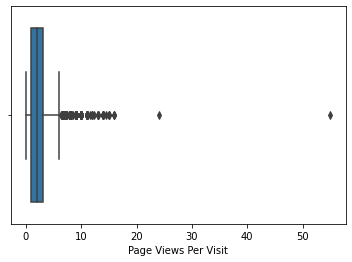

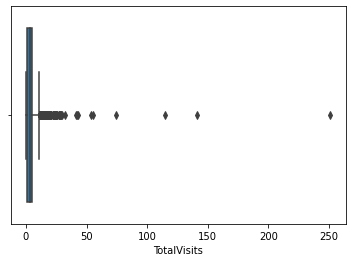

In [166]:
#For numeric variables checking for outliers to choose between mean and median for replacement
for i in ['Page Views Per Visit','TotalVisits']:
  sns.boxplot(df[i])
  plt.show()

In [167]:
#since both have outliers, replacing missing values with median
for i in ['Page Views Per Visit','TotalVisits']:
  df[i] = df[i].replace(np.NaN, df[i].median())
  df[i] = df[i].astype("int64")
100*df.isnull().mean().sort_values(ascending=False)  

Last Activity                                    1.114719
Lead Source                                      0.389610
Prospect ID                                      0.000000
Magazine                                         0.000000
A free copy of Mastering The Interview           0.000000
I agree to pay the amount through cheque         0.000000
City                                             0.000000
Get updates on DM Content                        0.000000
Update me on Supply Chain Content                0.000000
Tags                                             0.000000
Receive More Updates About Our Courses           0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Newspaper                                        0.000000
X Education Forums                               0.000000
Newspaper Article                                0.000000
Search                                           0.000000
Lead Number   

In [168]:
#for remaining categorical variable with missing values, replacing with mode
for i in ['Last Activity','Lead Source']:
  df[i] = df[i].replace(np.NaN, df[i].mode()[0])
100*df.isnull().mean().sort_values(ascending=False)  

Prospect ID                                      0.0
Lead Number                                      0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Tags                                             0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                

Observation: All Missing values are treated.

#### 2.2 Handling Outliers

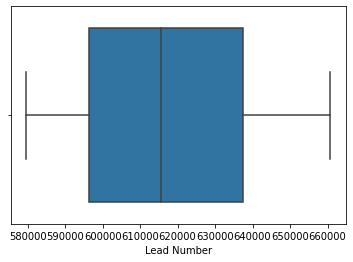

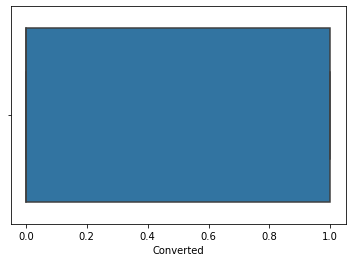

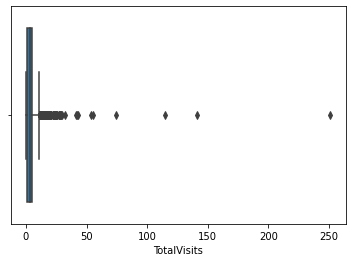

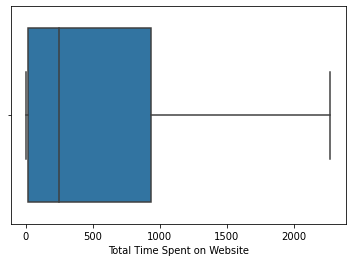

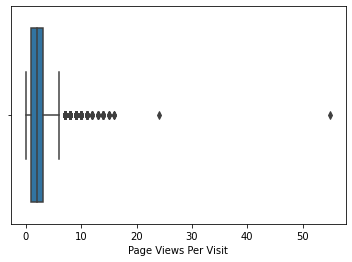

In [169]:
for i in df.select_dtypes(include="int64"):
  sns.boxplot(df[i])
  plt.show()

In [170]:
100*len(df[df['TotalVisits'] > 10])/len(df)
#3% outliers can be replaced

3.8203463203463204

In [171]:
100*len(df[df['Page Views Per Visit'] > 10])/len(df)
#0.5% outliers can be replaced

0.5411255411255411

In [172]:
for i in ['TotalVisits','Page Views Per Visit']:
    Q1 = np.percentile(df[i],25)
    Q3 = np.percentile(df[i],75)
    IQR = Q3-Q1
    LOWL = Q1-(1.5*IQR)
    UPL = Q3+(1.5*IQR)
    outliers = 0
    outliers = len(df[df[i]<LOWL])
    outliers = outliers + len(df[df[i]>UPL])
    print('Column ',i,'has ', outliers,' outliers before outlier treatment')    
    df[i] = np.where(df[i] > UPL,UPL,np.where(df[i] < LOWL,LOWL,df[i]))
    outliers = len(df[df[i]<LOWL])
    outliers = outliers + len(df[df[i]>UPL])
    print('Column ',i,'has ', outliers,' outliers after outlier treatment')

Column  TotalVisits has  267  outliers before outlier treatment
Column  TotalVisits has  0  outliers after outlier treatment
Column  Page Views Per Visit has  344  outliers before outlier treatment
Column  Page Views Per Visit has  0  outliers after outlier treatment


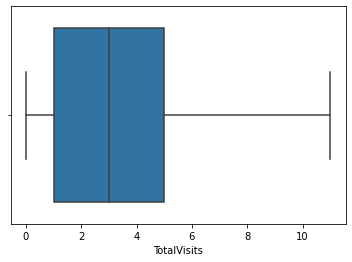

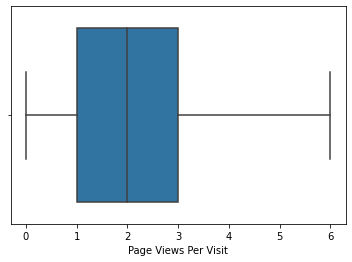

In [173]:
for i in df.select_dtypes(include="float64"):
  sns.boxplot(df[i])
  plt.show()

#### 2.3 Checking for data bias

In [174]:
#Checking for columns that have bias and are not significant for model building
for i in df.select_dtypes(include="object"):
  print(df[i].value_counts(normalize=True))

7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.000108
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.000108
46befc49-253a-419b-abea-2fd978d2e2b1    0.000108
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.000108
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.000108
                                          ...   
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    0.000108
644099a2-3da4-4d23-9546-7676340a372b    0.000108
2a093175-415b-4321-9e69-ed8d9df65a3c    0.000108
c66249a3-8500-4c66-a511-312d914573de    0.000108
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.000108
Name: Prospect ID, Length: 9240, dtype: float64
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
Google               0.314286
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites     

In [175]:
cols_to_rem = ['Do Not Email','Do Not Call','Update me on Supply Chain Content','Get updates on DM Content','Through Recommendations',
               'Receive More Updates About Our Courses','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Search','Magazine',
               'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Country']
df.drop(cols_to_rem, axis=1, inplace=True)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Better Career Prospects,Interested in other courses,Other,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.0,Email Opened,Other,Unemployed,Better Career Prospects,Ringing,Other,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,Modified


In [176]:
#Checking for spelling mistakes
df['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [177]:
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('welearnblog_Home','blog')
df['Lead Source'] = df['Lead Source'].replace('WeLearn','blog')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace('youtubechannel','Social Media')
df['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Social Media           58
bing                    6
Click2call              4
blog                    3
Live Chat               2
Press_Release           2
Pay per Click Ads       1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

#### 2.4 Conversion Rate to check imbalane ratio

In [178]:
### Checking the Conversion Rate
converted = (sum(df['Converted'])/len(df['Converted'].index))*100
converted

38.53896103896104

### 3. EDA

#### 3.1 Univariate Analysis

In [179]:
df_conv = df[df.Converted==1]
df_nconv = df[df.Converted==0]

In [180]:
#functions to create visualization plots for univariate analysis
def draw_distplot(cols):
    for i in cols:
        plt.figure(figsize=(15,5))
        sns.distplot(df_conv[i], hist=False, color='r',label ="Converted")
        sns.distplot(df_nconv[i], hist=False, color='b', label ="Not Converted")
        plt.title("TARGET V/S "+i, fontdict={'fontsize' : 12, 'fontweight' : 5, 'color' : 'Black'}) 
        plt.legend()
        plt.show()
def draw_piechart(cols):
    for i in cols:
        plt.subplot(1, 2, 1)
        temp = df_conv[i].value_counts().reset_index()
        temp = temp.rename(columns={i :"Column Name"})
        temp = temp[temp["Column Name"]*100/temp["Column Name"].sum() > 3] #Percentage cutoff - 3%
        plt.pie(temp["Column Name"],labels=temp["index"],autopct='%1.2f%%')
        plt.title('Distribution of ' + i + ' among Converted Leads',loc='center')        
        plt.show()
        plt.subplot(1, 2, 2)
        temp = df_nconv[i].value_counts().reset_index()
        temp = temp.rename(columns={i :"Column Name"})
        temp = temp[temp["Column Name"]*100/temp["Column Name"].sum() > 3] #Percentage cutoff - 3%
        plt.pie(temp["Column Name"],labels=temp["index"],autopct='%1.2f%%')
        plt.title('Distribution of ' + i + ' among not converted leads',loc='center')        
        plt.show()        

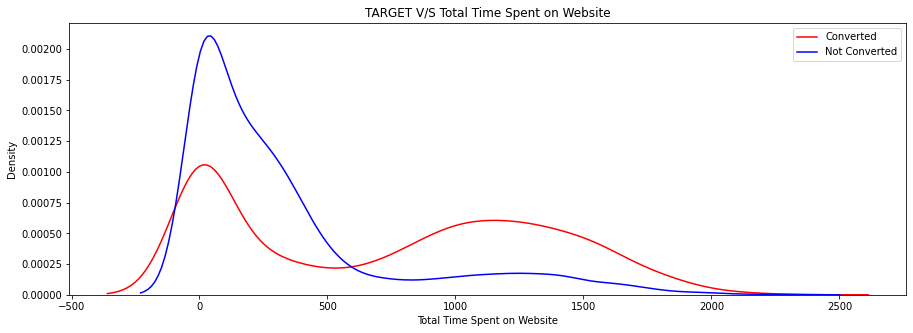

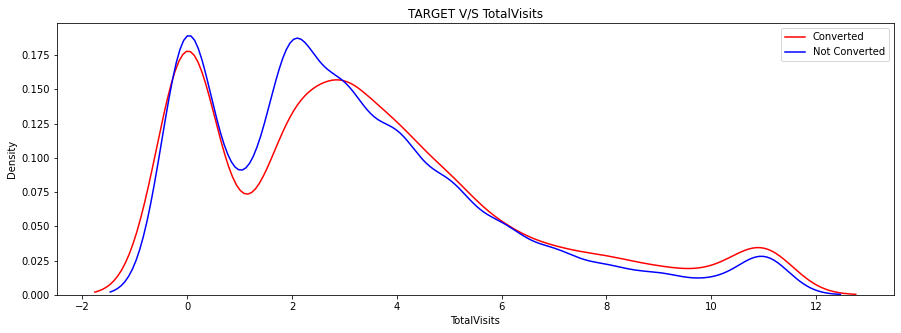

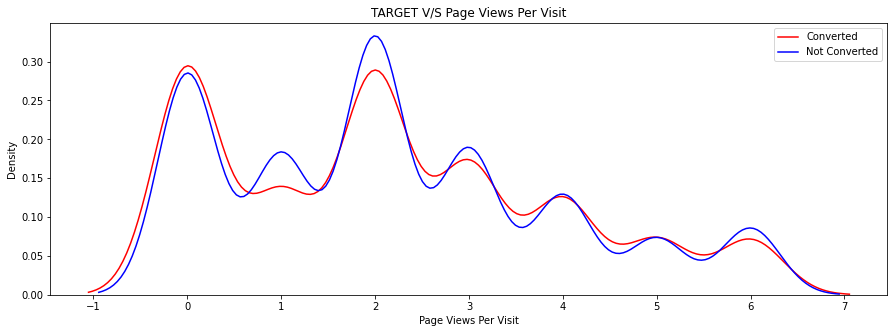

In [181]:
draw_distplot(['Total Time Spent on Website','TotalVisits', 'Page Views Per Visit'])
#Observation - 
#Total Time Spent on Website > 600 indicates higher chance of conversion
#Total Visits > 3 indicates higher chance of conversion
#Page Views Per Visits < 1 indicates slightly higher chance of conversion

In [182]:
df.select_dtypes(include='object')

,Prospect ID,Lead Origin,Lead Source,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,Page Visited on Website,Other,Unemployed,Better Career Prospects,Interested in other courses,Other,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,Email Opened,Other,Unemployed,Better Career Prospects,Ringing,Other,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,Converted to Lead,Other,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,Modified
...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,Landing Page Submission,Direct Traffic,Email Marked Spam,IT Projects Management,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,Landing Page Submission,Direct Traffic,SMS Sent,Media and Advertising,Unemployed,Better Career Prospects,wrong number given,Mumbai,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,Landing Page Submission,Direct Traffic,SMS Sent,Business Administration,Unemployed,Better Career Prospects,invalid number,Mumbai,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,Landing Page Submission,Google,SMS Sent,Human Resource Management,Other,Other,Other,Other Metro Cities,SMS Sent


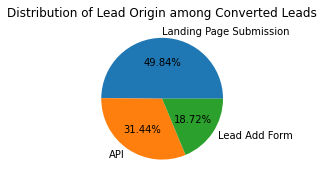

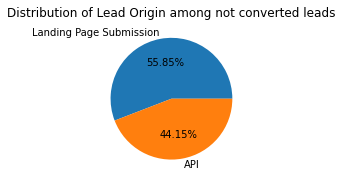

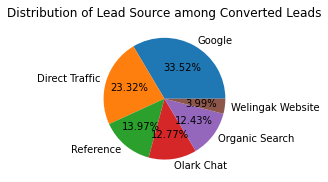

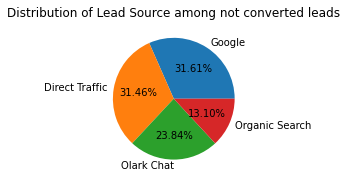

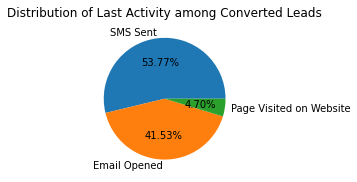

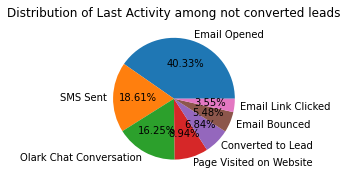

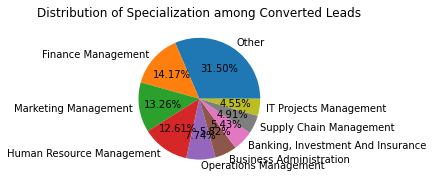

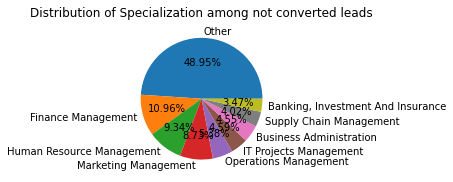

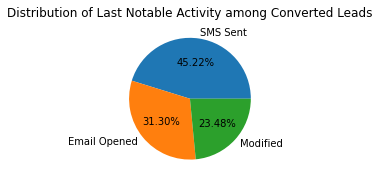

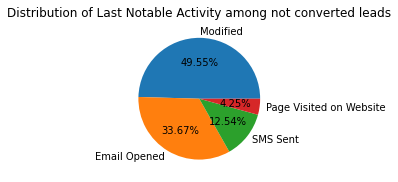

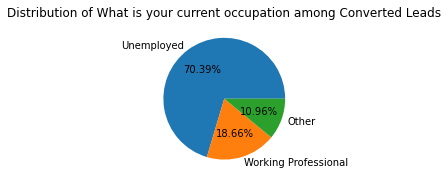

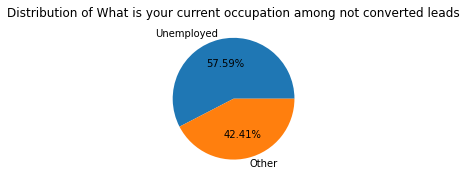

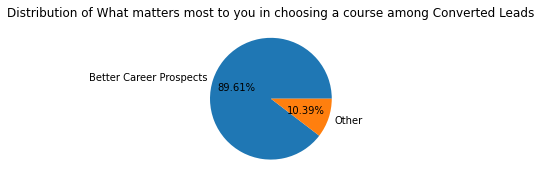

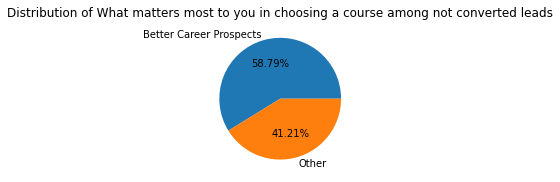

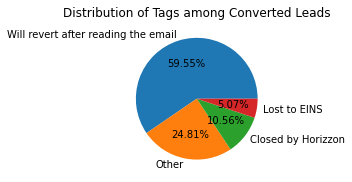

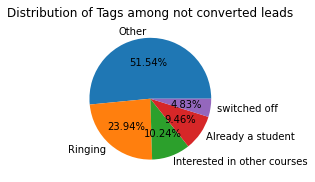

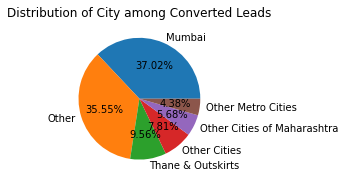

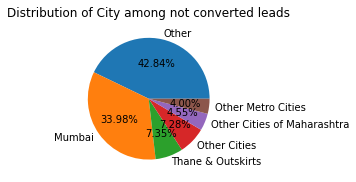

In [183]:
cat_cols = ['Lead Origin','Lead Source','Last Activity','Specialization','Last Notable Activity','What is your current occupation',
          'What matters most to you in choosing a course','Tags','City']
draw_piechart(cat_cols)

#Observation:
#Lead Origin - Landing Page Submission for both - not good factor
#Lead Source - Google for both - not good factor
#Last Activity - SMS Sent for converted and Email Opened for not converted - good factor
#Specialization - other for both followed by finance management - not a good factor
#Last Notable Activity - SMS sent for converted and Modified for not converted - good factor
#Current Occupation - unemployed for both - not a good factor
#Reason - better career prospects for both - not a good factor
#Tags - Will revert after reading the email for converted and Other for not converted - good factor
#City - Mumbai for converted and Other for not converted - good factor

### 3.2 Bivariate Analysis

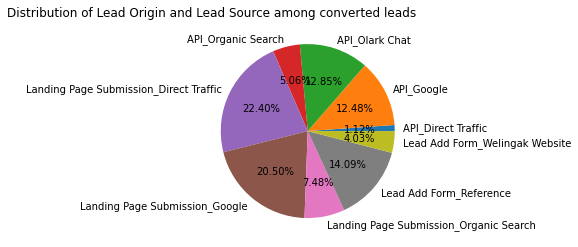

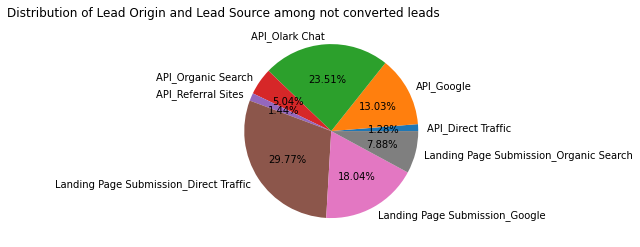

In [184]:
temp = df_conv.groupby(by = ["Lead Origin","Lead Source"])['Converted'].sum().reset_index()
temp["CATEGORY"] = temp.apply(lambda x: str(x['Lead Origin']) + '_' + str(x['Lead Source']), axis=1)
temp = temp[temp["Converted"]*100/temp["Converted"].sum() > 1] #Percentage cutoff - 1%
plt.pie(temp["Converted"],labels=temp["CATEGORY"],autopct='%1.2f%%')
plt.title('Distribution of Lead Origin and Lead Source among converted leads',loc='right')
plt.show()

temp = df_nconv.groupby(by = ["Lead Origin","Lead Source"])['Converted'].count().reset_index()
temp["CATEGORY"] = temp.apply(lambda x: str(x['Lead Origin']) + '_' + str(x['Lead Source']), axis=1)
temp = temp[temp["Converted"]*100/temp["Converted"].sum() > 1] #Percentage cutoff - 1%
plt.pie(temp["Converted"],labels=temp["CATEGORY"],autopct='%1.2f%%')
plt.title('Distribution of Lead Origin and Lead Source among not converted leads',loc='right')
plt.show()
#observation: Landing page submission through direct traffic is the highest source for converted and not converted leads. 
#It doesnt seem to a good factor to determine conversion.


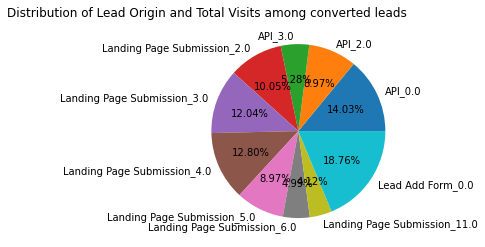

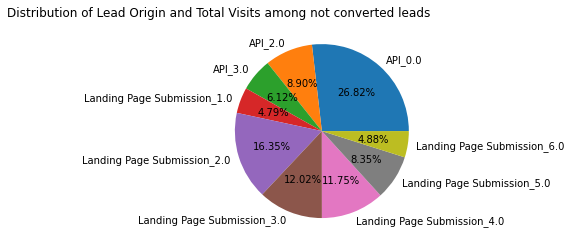

In [185]:
temp = df_conv.groupby(by = ["Lead Origin","TotalVisits"])['Converted'].sum().reset_index()
temp["CATEGORY"] = temp.apply(lambda x: str(x['Lead Origin']) + '_' + str(x['TotalVisits']), axis=1)
temp = temp[temp["Converted"]*100/temp["Converted"].sum() > 3] #Percentage cutoff - 3%
plt.pie(temp["Converted"],labels=temp["CATEGORY"],autopct='%1.2f%%')
plt.title('Distribution of Lead Origin and Total Visits among converted leads',loc='right')
plt.show()

temp = df_nconv.groupby(by = ["Lead Origin","TotalVisits"])['Converted'].count().reset_index()
temp["CATEGORY"] = temp.apply(lambda x: str(x['Lead Origin']) + '_' + str(x['TotalVisits']), axis=1)
temp = temp[temp["Converted"]*100/temp["Converted"].sum() > 3] #Percentage cutoff - 3%
plt.pie(temp["Converted"],labels=temp["CATEGORY"],autopct='%1.2f%%')
plt.title('Distribution of Lead Origin and Total Visits among not converted leads',loc='right')
plt.show()
#observation: Landing page submission with total visits 4 has highest converted leads where as Landing page submission with 
#total visits 2 has highest nont converted leads. This can be a good factor for conversion


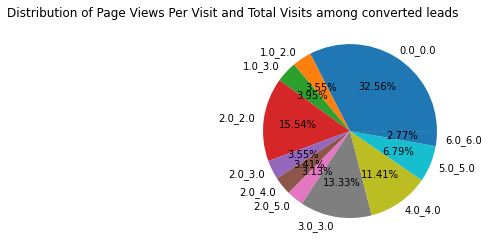

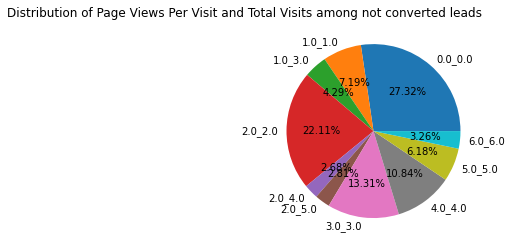

In [186]:
temp = df_conv.groupby(by = ["Page Views Per Visit","TotalVisits"])['Converted'].sum().reset_index()
temp["CATEGORY"] = temp.apply(lambda x: str(x['Page Views Per Visit']) + '_' + str(x['TotalVisits']), axis=1)
temp = temp[temp["Converted"]*100/temp["Converted"].sum() > 2] #Percentage cutoff - 2%
plt.pie(temp["Converted"],labels=temp["CATEGORY"],autopct='%1.2f%%')
plt.title('Distribution of Page Views Per Visit and Total Visits among converted leads',loc='right')
plt.show()

temp = df_nconv.groupby(by = ["Page Views Per Visit","TotalVisits"])['Converted'].count().reset_index()
temp["CATEGORY"] = temp.apply(lambda x: str(x['Page Views Per Visit']) + '_' + str(x['TotalVisits']), axis=1)
temp = temp[temp["Converted"]*100/temp["Converted"].sum() > 2] #Percentage cutoff - 2%
plt.pie(temp["Converted"],labels=temp["CATEGORY"],autopct='%1.2f%%')
plt.title('Distribution of Page Views Per Visit and Total Visits among not converted leads',loc='right')
plt.show()
#observation: 0 visits has highest contribution for converted and not converted leads. 
#Thus, this combination is not a good factor for conversion.

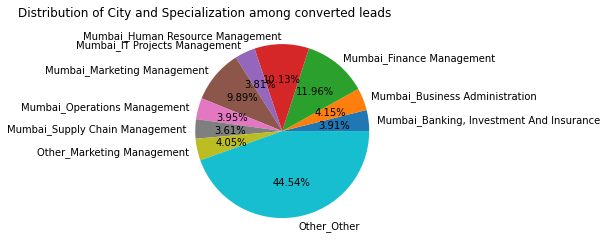

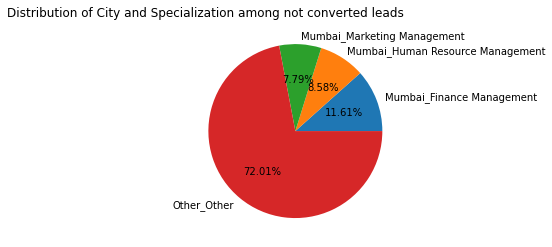

In [187]:
temp = df_conv.groupby(by = ["City","Specialization"])['Converted'].sum().reset_index()
temp["CATEGORY"] = temp.apply(lambda x: str(x['City']) + '_' + str(x['Specialization']), axis=1)
temp = temp[temp["Converted"]*100/temp["Converted"].sum() > 2] #Percentage cutoff - 2%
plt.pie(temp["Converted"],labels=temp["CATEGORY"],autopct='%1.2f%%')
plt.title('Distribution of City and Specialization among converted leads',loc='right')
plt.show()

temp = df_nconv.groupby(by = ["City","Specialization"])['Converted'].count().reset_index()
temp["CATEGORY"] = temp.apply(lambda x: str(x['City']) + '_' + str(x['Specialization']), axis=1)
temp = temp[temp["Converted"]*100/temp["Converted"].sum() > 3] #Percentage cutoff - 3%
plt.pie(temp["Converted"],labels=temp["CATEGORY"],autopct='%1.2f%%')
plt.title('Distribution of City and Specialization among not converted leads',loc='right')
plt.show()
#observation: Mumbai_Finance Management has highest contribution (excluding Other categories) for both converted and non converted leads 
#Thus, this combination is not a good factor for conversion.

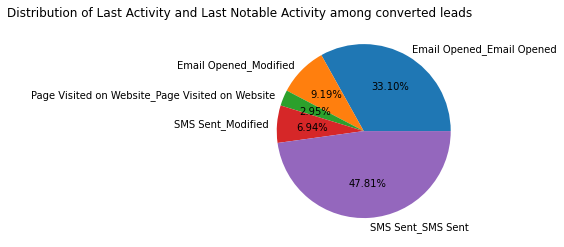

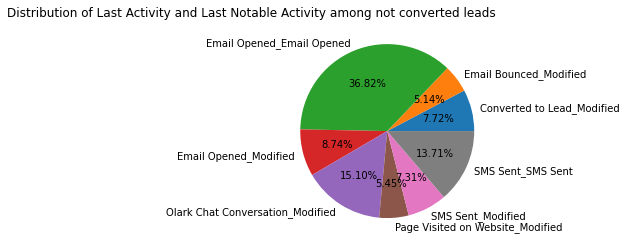

In [188]:
temp = df_conv.groupby(by = ["Last Activity","Last Notable Activity"])['Converted'].sum().reset_index()
temp["CATEGORY"] = temp.apply(lambda x: str(x['Last Activity']) + '_' + str(x['Last Notable Activity']), axis=1)
temp = temp[temp["Converted"]*100/temp["Converted"].sum() > 2] #Percentage cutoff - 2%
plt.pie(temp["Converted"],labels=temp["CATEGORY"],autopct='%1.2f%%')
plt.title('Distribution of Last Activity and Last Notable Activity among converted leads',loc='right')
plt.show()

temp = df_nconv.groupby(by = ["Last Activity","Last Notable Activity"])['Converted'].count().reset_index()
temp["CATEGORY"] = temp.apply(lambda x: str(x['Last Activity']) + '_' + str(x['Last Notable Activity']), axis=1)
temp = temp[temp["Converted"]*100/temp["Converted"].sum() > 4] #Percentage cutoff - 4%
plt.pie(temp["Converted"],labels=temp["CATEGORY"],autopct='%1.2f%%')
plt.title('Distribution of Last Activity and Last Notable Activity among not converted leads',loc='right')
plt.show()
#observation: SMS Sent for converted and Email Opened for not converted. Any one of the column can be used as a good factor for conversion.

#### 3.3 Multivariate Analysis

### 4. Data Preparation for Model Building

### 4.1 Reducing categories for categorical variables

In [189]:
for i in df.select_dtypes(include="object"):
  print(100*df[i].value_counts(normalize=True))

7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.010823
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.010823
46befc49-253a-419b-abea-2fd978d2e2b1    0.010823
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.010823
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.010823
                                          ...   
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    0.010823
644099a2-3da4-4d23-9546-7676340a372b    0.010823
2a093175-415b-4321-9e69-ed8d9df65a3c    0.010823
c66249a3-8500-4c66-a511-312d914573de    0.010823
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.010823
Name: Prospect ID, Length: 9240, dtype: float64
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
Google               31.482684
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral

In [190]:
df['Tags'].value_counts()

Other                                                3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [191]:
df['Tags'] = df['Tags'].replace('Ringing','Not reachable')
df['Tags'] = df['Tags'].replace('switched off','Not reachable')
df['Tags'] = df['Tags'].replace('Busy','Not reachable')
df['Tags'] = df['Tags'].replace('opp hangup','Not reachable')
df['Tags'] = df['Tags'].replace('invalid number','invalid or missing number')
df['Tags'] = df['Tags'].replace('wrong number given','invalid or missing number')
df['Tags'] = df['Tags'].replace('number not provided','invalid or missing number')
df['Tags'] = df['Tags'].replace('University not recognized','Recognition issue (DEC approval)')
df['Tags'] = df['Tags'].replace('Shall take in the next coming month','Next batch')
df['Tags'] = df['Tags'].replace('Interested in Next batch','Next batch')
df['Tags'] = df['Tags'].replace('Closed by Horizzon','Lost to Competitors')
df['Tags'] = df['Tags'].replace('Lost to Others','Lost to Competitors')
df['Tags'] = df['Tags'].replace('in touch with EINS','Lost to Competitors')
df['Tags'] = df['Tags'].replace('Lost to EINS','Lost to Competitors')
df['Tags'] = df['Tags'].replace('In confusion whether part time or DLP','Reply Awaited')
df['Tags'] = df['Tags'].replace('Still Thinking','Reply Awaited')
df['Tags'] = df['Tags'].replace('Will revert after reading the email','Reply Awaited')
df['Tags'] = df['Tags'].replace('Want to take admission but has financial problems','Interested but financial issues')
df['Tags'].value_counts()

Other                               3353
Reply Awaited                       2083
Not reachable                       1662
Lost to Competitors                  552
Interested in other courses          513
Already a student                    465
invalid or missing number            157
Not doing further education          145
Interested  in full time MBA         117
Graduation in progress               111
Diploma holder (Not Eligible)         63
Next batch                             7
Interested but financial issues        6
Lateral student                        3
Recognition issue (DEC approval)       3
Name: Tags, dtype: int64

In [192]:
#Reducing categories
cols_to_combine = []
temp = df['Lead Source'].value_counts().reset_index()
temp = temp[temp["Lead Source"]*100/temp["Lead Source"].sum() < 2]
for i in temp['index']:
    cols_to_combine.append(i)
cols_to_combine

['Welingak Website',
 'Referral Sites',
 'Social Media',
 'bing',
 'Click2call',
 'blog',
 'Live Chat',
 'Press_Release',
 'Pay per Click Ads',
 'testone',
 'NC_EDM']

In [193]:
cols_to_combine1 = []
temp = df['Last Activity'].value_counts().reset_index()
temp = temp[temp["Last Activity"]*100/temp["Last Activity"].sum() < 2]
for i in temp['index']:
    cols_to_combine1.append(i)
cols_to_combine1

['Form Submitted on Website',
 'Unreachable',
 'Unsubscribed',
 'Had a Phone Conversation',
 'Approached upfront',
 'View in browser link Clicked',
 'Email Received',
 'Email Marked Spam',
 'Visited Booth in Tradeshow',
 'Resubscribed to emails']

In [194]:
cols_to_combine2 = []
temp = df['Specialization'].value_counts().reset_index()
temp = temp[temp["Specialization"]*100/temp["Specialization"].sum() < 4]
for i in temp['index']:
    cols_to_combine2.append(i)
cols_to_combine2

['IT Projects Management',
 'Supply Chain Management',
 'Banking, Investment And Insurance',
 'Travel and Tourism',
 'Media and Advertising',
 'International Business',
 'Healthcare Management',
 'Hospitality Management',
 'E-COMMERCE',
 'Retail Management',
 'Rural and Agribusiness',
 'E-Business',
 'Services Excellence']

In [195]:
cols_to_combine3 = []
temp = df['Tags'].value_counts().reset_index()
temp = temp[temp["Tags"]*100/temp["Tags"].sum() < 2]
for i in temp['index']:
    cols_to_combine3.append(i)
cols_to_combine3

['invalid or missing number',
 'Not doing further education',
 'Interested  in full time MBA',
 'Graduation in progress',
 'Diploma holder (Not Eligible)',
 'Next batch',
 'Interested but financial issues',
 'Lateral student',
 'Recognition issue (DEC approval)']

In [196]:
cols_to_combine4 = []
temp = df['Last Notable Activity'].value_counts().reset_index()
temp = temp[temp["Last Notable Activity"]*100/temp["Last Notable Activity"].sum() < 2]
for i in temp['index']:
    cols_to_combine4.append(i)
cols_to_combine4

['Olark Chat Conversation',
 'Email Link Clicked',
 'Email Bounced',
 'Unsubscribed',
 'Unreachable',
 'Had a Phone Conversation',
 'Email Marked Spam',
 'Approached upfront',
 'Resubscribed to emails',
 'View in browser link Clicked',
 'Form Submitted on Website',
 'Email Received']

In [197]:
df['Lead Source'] = df['Lead Source'].replace(cols_to_combine, 'Other')
df['Last Activity'] = df['Last Activity'].replace(cols_to_combine1, 'Other')
df['Specialization'] = df['Specialization'].replace(cols_to_combine2, 'Other')
df['Tags'] = df['Tags'].replace(cols_to_combine3, 'Other')
df['Last Notable Activity'] = df['Last Notable Activity'].replace(cols_to_combine4, 'Other')

### 4.2 Creating dummy variables

In [198]:
# Dropping the first column from the dummies created using 'drop_first = True' to avoid multicollinearity in the model
leadorigin = pd.get_dummies(df['Lead Origin'], drop_first = True, prefix = 'leadorigin')
leadsource = pd.get_dummies(df['Lead Source'], drop_first = True, prefix = 'leadsource')
lastactivity = pd.get_dummies(df['Last Activity'], drop_first = True, prefix = 'lastactivity')
specialization = pd.get_dummies(df['Specialization'], drop_first = True, prefix = 'specialization')
currentocc = pd.get_dummies(df['What is your current occupation'], drop_first = True, prefix = 'currentocc')
reason = pd.get_dummies(df['What matters most to you in choosing a course'], drop_first = True, prefix = 'reason')
tags = pd.get_dummies(df['Tags'], drop_first = True, prefix = 'tags')
city = pd.get_dummies(df['City'], drop_first = True, prefix = 'city')
lastnotableact = pd.get_dummies(df['Last Notable Activity'], drop_first = True, prefix = 'lastnotableact')

In [199]:
df = pd.concat([df,leadorigin, leadsource, lastactivity, specialization,currentocc, reason, tags, city,lastnotableact ],axis=1)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,Last Notable Activity,leadorigin_Landing Page Submission,leadorigin_Lead Add Form,leadorigin_Lead Import,leadorigin_Quick Add Form,leadsource_Google,leadsource_Olark Chat,leadsource_Organic Search,leadsource_Other,leadsource_Reference,lastactivity_Email Bounced,lastactivity_Email Link Clicked,lastactivity_Email Opened,lastactivity_Olark Chat Conversation,lastactivity_Other,lastactivity_Page Visited on Website,lastactivity_SMS Sent,specialization_Finance Management,specialization_Human Resource Management,specialization_Marketing Management,specialization_Operations Management,specialization_Other,currentocc_Housewife,currentocc_Other,currentocc_Student,currentocc_Unemployed,currentocc_Working Professional,reason_Flexibility & Convenience,reason_Other,tags_Interested in other courses,tags_Lost to Competitors,tags_Not reachable,tags_Other,tags_Reply Awaited,city_Other,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier II Cities,lastnotableact_Modified,lastnotableact_Other,lastnotableact_Page Visited on Website,lastnotableact_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Better Career Prospects,Interested in other courses,Other,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.0,Email Opened,Other,Unemployed,Better Career Prospects,Not reachable,Other,Email Opened,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Reply Awaited,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Other,Unemployed,Better Career Prospects,Not reachable,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Better Career Prospects,Reply Awaited,Mumbai,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [200]:
df.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','What matters most to you in choosing a course','Tags','City','Last Notable Activity'],axis=1,inplace=True)
df.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,leadorigin_Landing Page Submission,leadorigin_Lead Add Form,leadorigin_Lead Import,leadorigin_Quick Add Form,leadsource_Google,leadsource_Olark Chat,leadsource_Organic Search,leadsource_Other,leadsource_Reference,lastactivity_Email Bounced,lastactivity_Email Link Clicked,lastactivity_Email Opened,lastactivity_Olark Chat Conversation,lastactivity_Other,lastactivity_Page Visited on Website,lastactivity_SMS Sent,specialization_Finance Management,specialization_Human Resource Management,specialization_Marketing Management,specialization_Operations Management,specialization_Other,currentocc_Housewife,currentocc_Other,currentocc_Student,currentocc_Unemployed,currentocc_Working Professional,reason_Flexibility & Convenience,reason_Other,tags_Interested in other courses,tags_Lost to Competitors,tags_Not reachable,tags_Other,tags_Reply Awaited,city_Other,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier II Cities,lastnotableact_Modified,lastnotableact_Other,lastnotableact_Page Visited on Website,lastnotableact_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [201]:
final_df = df.drop(['Prospect ID','Lead Number'],axis=1)
final_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,leadorigin_Landing Page Submission,leadorigin_Lead Add Form,leadorigin_Lead Import,leadorigin_Quick Add Form,leadsource_Google,leadsource_Olark Chat,leadsource_Organic Search,leadsource_Other,leadsource_Reference,lastactivity_Email Bounced,lastactivity_Email Link Clicked,lastactivity_Email Opened,lastactivity_Olark Chat Conversation,lastactivity_Other,lastactivity_Page Visited on Website,lastactivity_SMS Sent,specialization_Finance Management,specialization_Human Resource Management,specialization_Marketing Management,specialization_Operations Management,specialization_Other,currentocc_Housewife,currentocc_Other,currentocc_Student,currentocc_Unemployed,currentocc_Working Professional,reason_Flexibility & Convenience,reason_Other,tags_Interested in other courses,tags_Lost to Competitors,tags_Not reachable,tags_Other,tags_Reply Awaited,city_Other,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier II Cities,lastnotableact_Modified,lastnotableact_Other,lastnotableact_Page Visited on Website,lastnotableact_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [202]:
final_df.shape

(9240, 47)

### 4.4 Multicollinearity check using correlation matrix

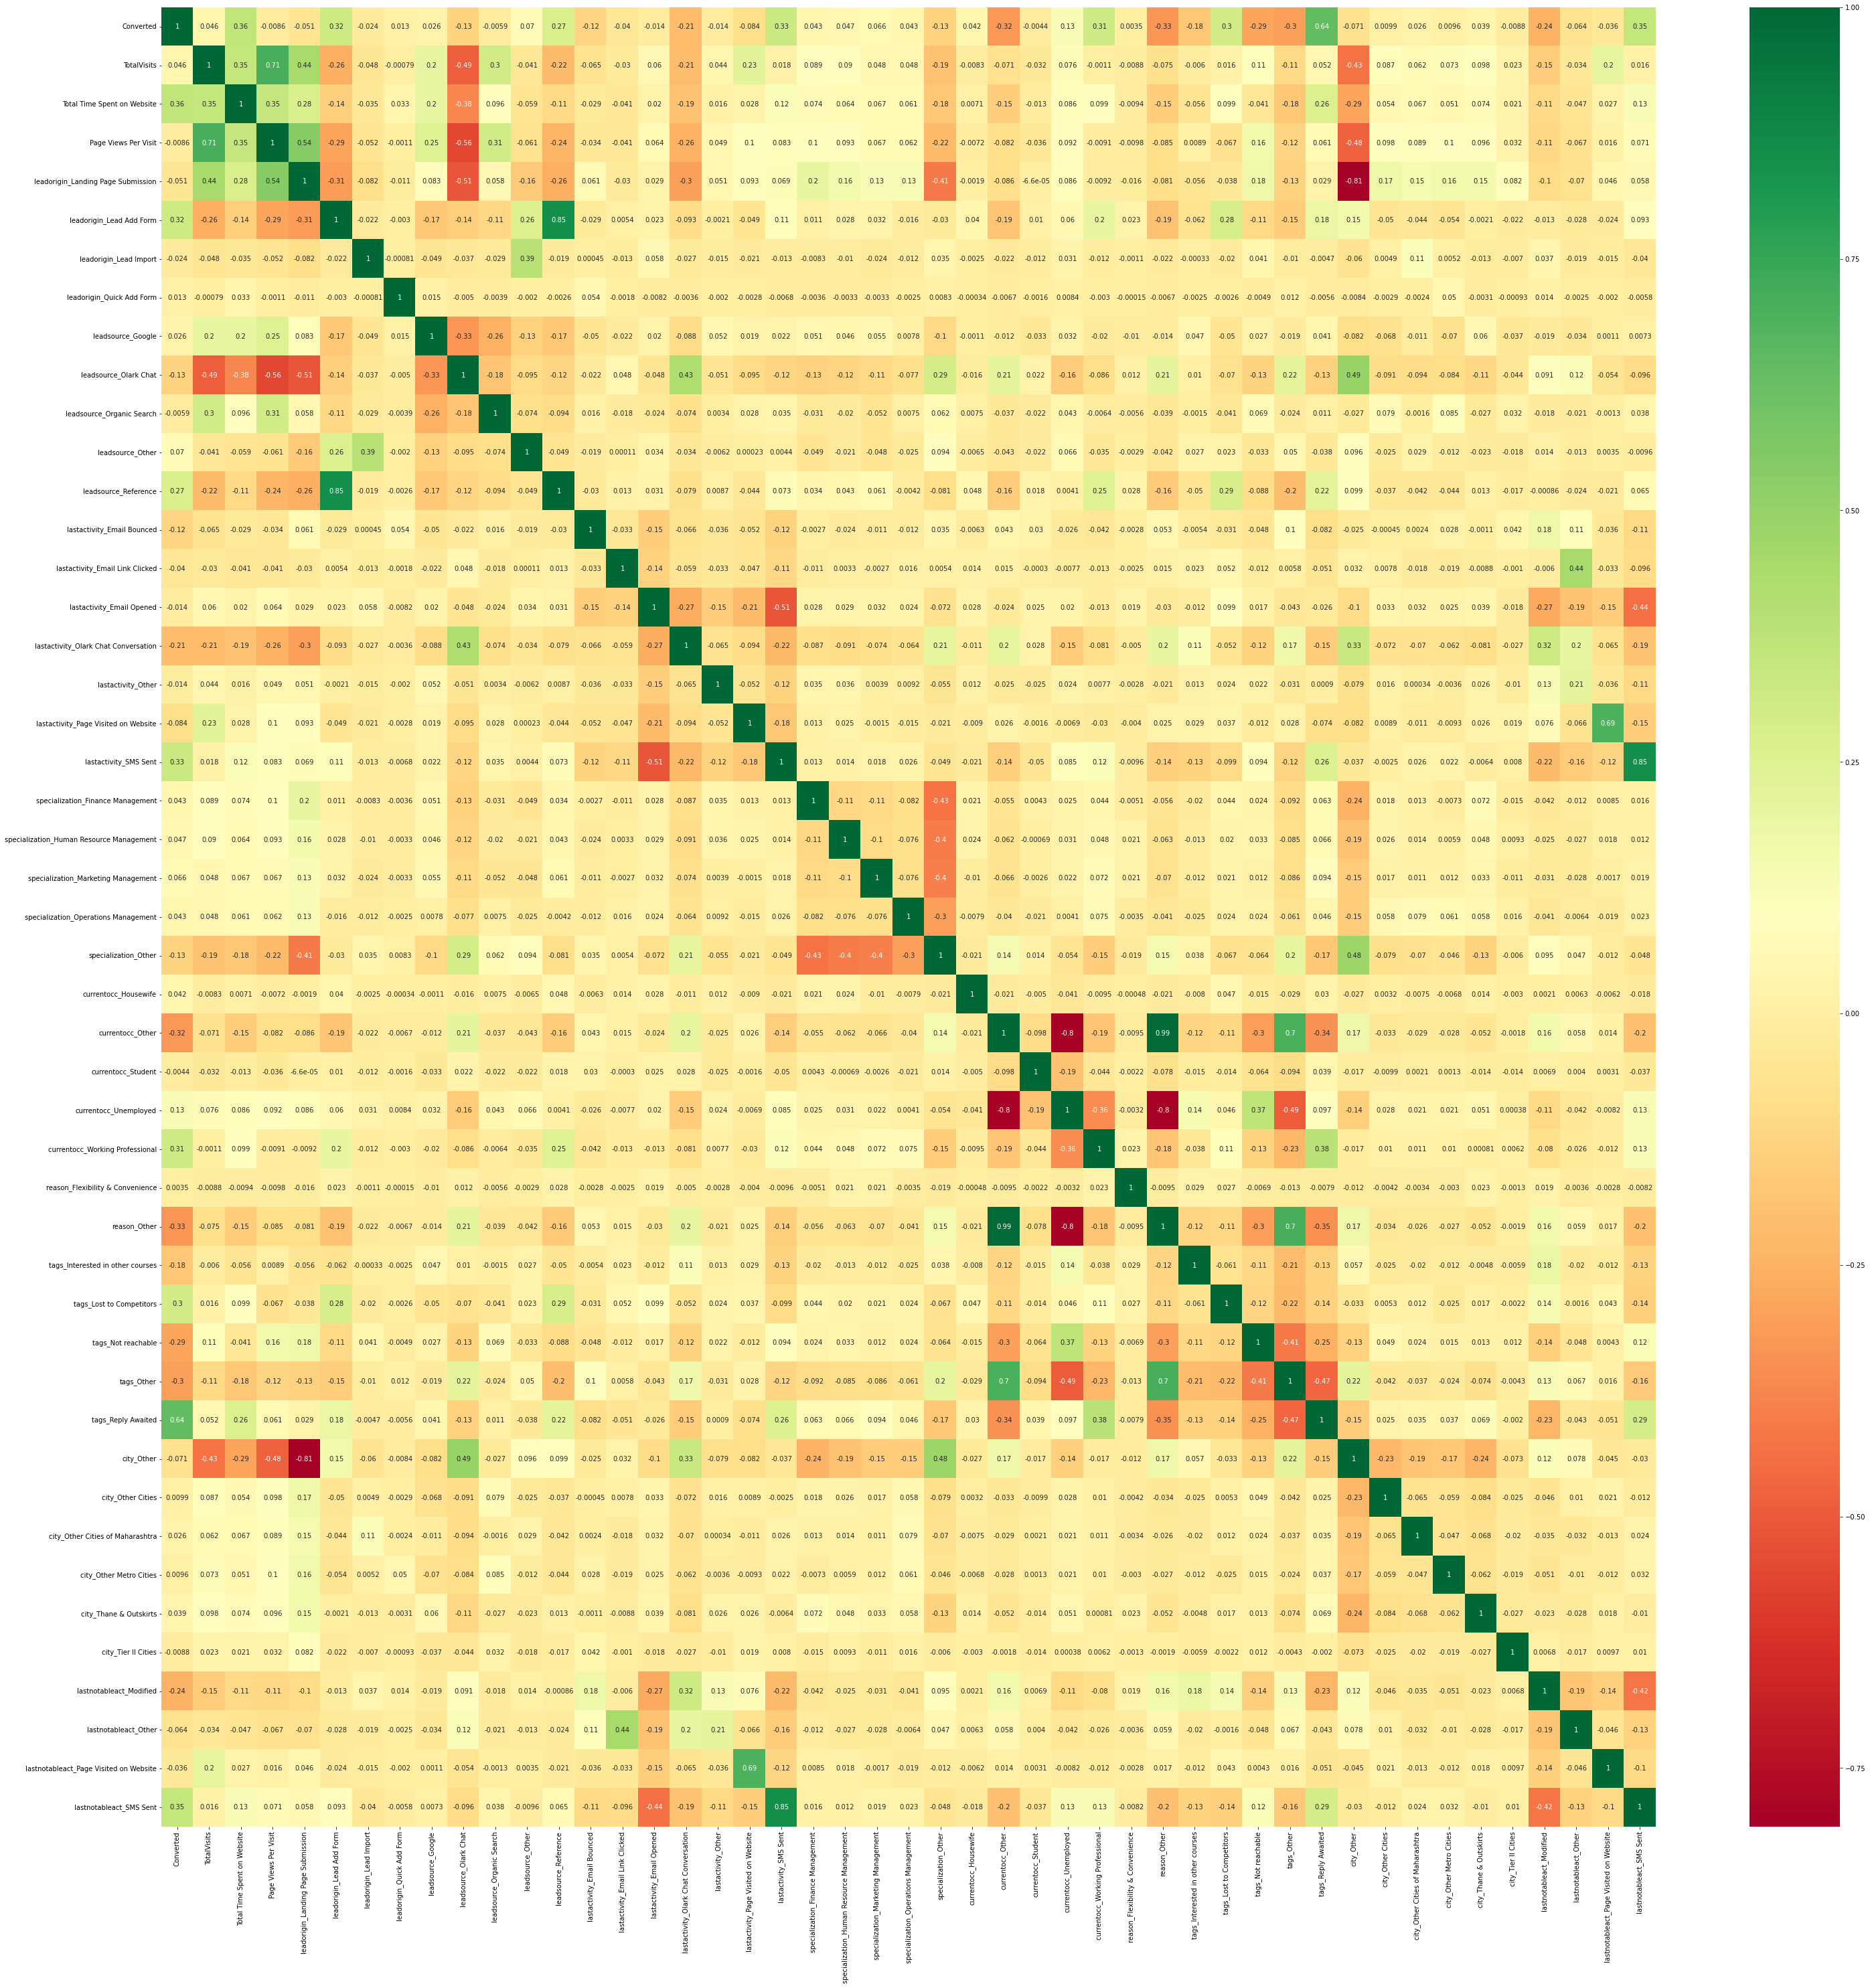

In [203]:
#checking correlation between numeric and boolean variables with Converted
res = final_df.corr()
f, ax = plt.subplots(figsize=(50,50))
ax = sns.heatmap(res, annot=True, cmap='RdYlGn')
plt.show()


In [204]:
#Dropping columns that are highly correlation to remove multicollinearity
final_df.drop(['Page Views Per Visit','leadorigin_Lead Add Form','leadsource_Olark Chat','lastactivity_Email Opened','specialization_Other','city_Other','lastactivity_Email Opened',
               'lastactivity_Email Link Clicked','lastactivity_Page Visited on Website','lastactivity_SMS Sent','currentocc_Other','reason_Other','tags_Other','lastnotableact_Modified',
               'currentocc_Unemployed','tags_Not reachable'],axis=1,inplace=True)

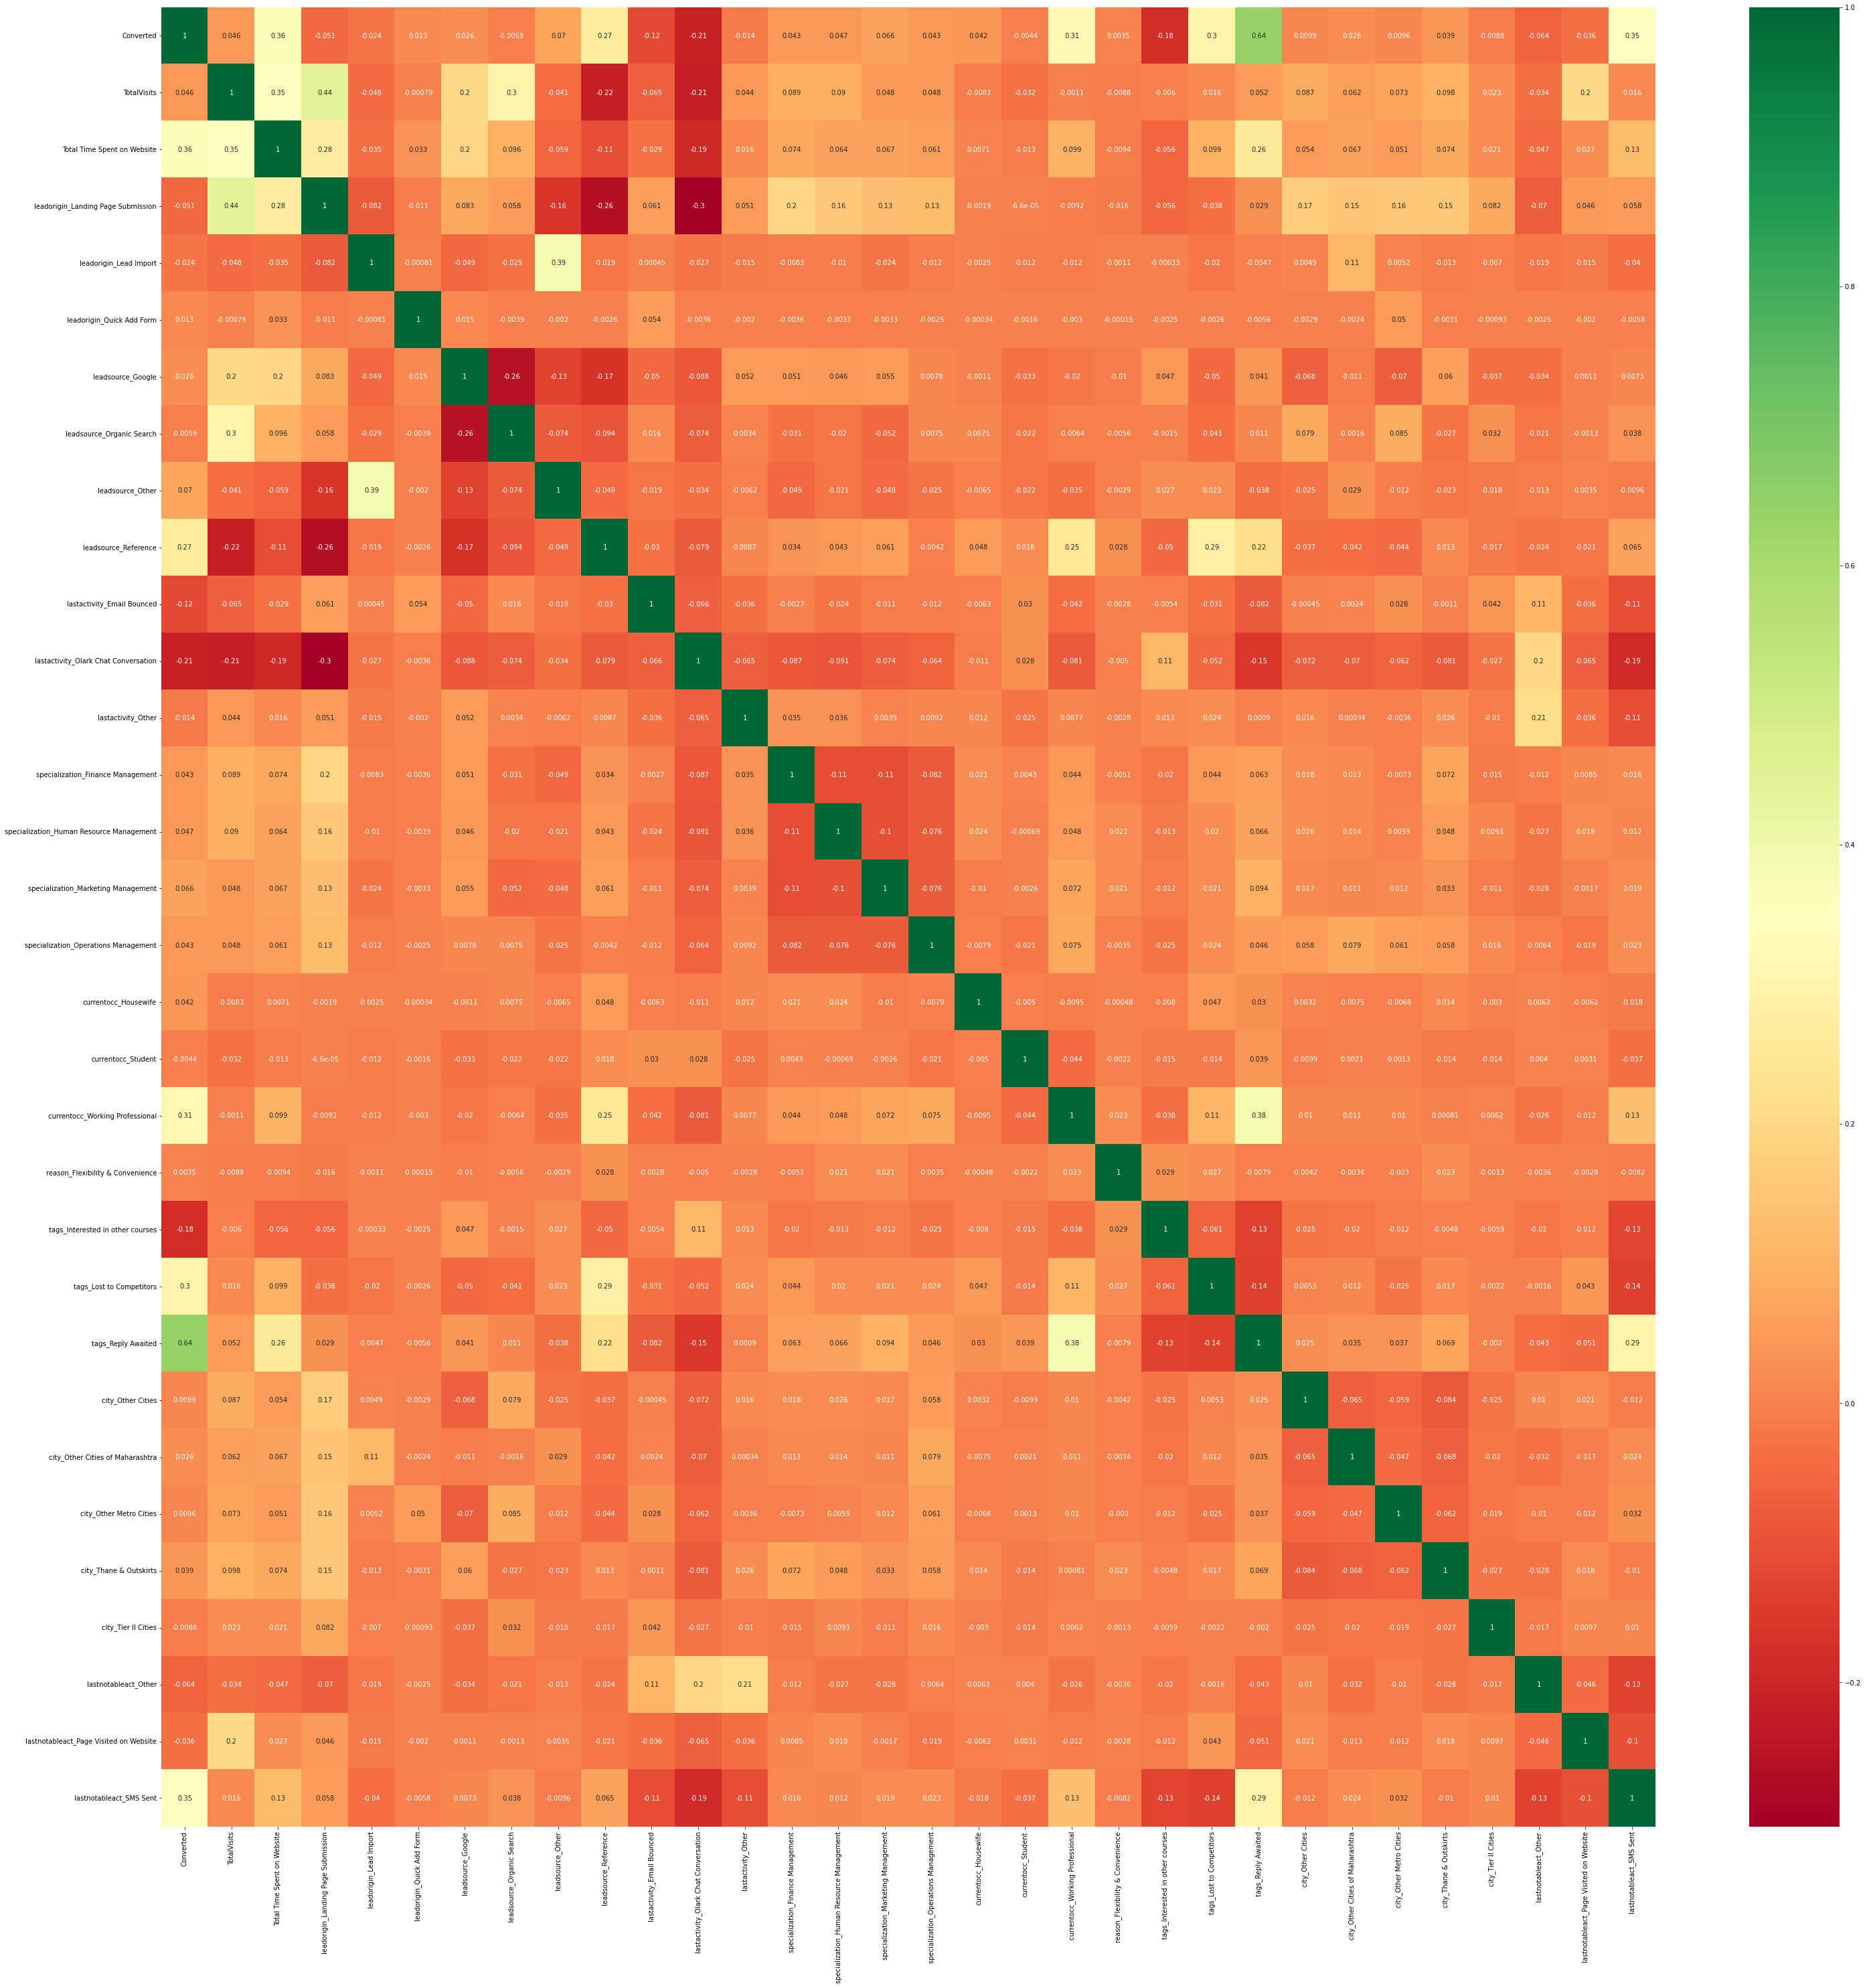

In [205]:
#checking correlation between numeric and boolean variables with SalesPrice
res = final_df.corr()
f, ax = plt.subplots(figsize=(50,50))
ax = sns.heatmap(res, annot=True, cmap='RdYlGn')
plt.show()


### 5. Model Building and Evaluation

In [206]:
# Putting feature variable to X
X = final_df.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,leadorigin_Landing Page Submission,leadorigin_Lead Import,leadorigin_Quick Add Form,leadsource_Google,leadsource_Organic Search,leadsource_Other,leadsource_Reference,lastactivity_Email Bounced,lastactivity_Olark Chat Conversation,lastactivity_Other,specialization_Finance Management,specialization_Human Resource Management,specialization_Marketing Management,specialization_Operations Management,currentocc_Housewife,currentocc_Student,currentocc_Working Professional,reason_Flexibility & Convenience,tags_Interested in other courses,tags_Lost to Competitors,tags_Reply Awaited,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier II Cities,lastnotableact_Other,lastnotableact_Page Visited on Website,lastnotableact_SMS Sent
0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,5.0,674,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1.0,305,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,1428,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [207]:
# Putting response variable to y
y = final_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

#### 5.1 Train and Test Data Split

In [208]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### 5.2 Standardizing data

In [209]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,leadorigin_Landing Page Submission,leadorigin_Lead Import,leadorigin_Quick Add Form,leadsource_Google,leadsource_Organic Search,leadsource_Other,leadsource_Reference,lastactivity_Email Bounced,lastactivity_Olark Chat Conversation,lastactivity_Other,specialization_Finance Management,specialization_Human Resource Management,specialization_Marketing Management,specialization_Operations Management,currentocc_Housewife,currentocc_Student,currentocc_Working Professional,reason_Flexibility & Convenience,tags_Interested in other courses,tags_Lost to Competitors,tags_Reply Awaited,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier II Cities,lastnotableact_Other,lastnotableact_Page Visited on Website,lastnotableact_SMS Sent
1871,-1.122305,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6795,0.275215,0.005716,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3516,0.624595,-0.691418,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8105,0.624595,1.365219,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3934,-1.122305,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 5.3 Model Building and Prediction

In [210]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6436
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1660.4
Date:                Sun, 19 Feb 2023   Deviance:                       3320.8
Time:                        07:30:16   Pearson chi2:                 6.34e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.4715      0.108    -13.650      0.000      -1.683      -1.260
TotalVisits                                  0.0067      0.058      0.117      0.907      -0.106       0.120
Total Time Spent on Website                  0.8779      0.049     17.884      0.000       0.782       0.974
leadorigin_Landing Page Submission          -1.4066      0.128    -10.981      0.000      -1.658      -1.156
leadorigin_Lead Import                      -2.4900      0.730     -3.412      0.001      -3.920      -1.060
leadorigin_Quick Add Form                   22.7219   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
leadsource_Google                           -0.0413      0.111     -0.372      0.710      -0.259       0.176
leadsource_Organic Search                   -0.3752      0.158     -2.372      0.018      -0.685      -0.065
leadsource_Other                             1.7068      0.208      8.218      0.000       1.300       2.114
leadsource_Reference                         0.0152      0.292      0.052      0.959      -0.558       0.588
lastactivity_Email Bounced                  -1.4583      0.412     -3.541      0.000      -2.265      -0.651
lastactivity_Olark Chat Conversation        -1.2818      0.226     -5.669      0.000      -1.725      -0.839
lastactivity_Other                          -0.2908      0.301     -0.967      0.334      -0.881       0.299
specialization_Finance Management            0.0339      0.175      0.193      0.847      -0.309       0.377
specialization_Human Resource Management     0.0038      0.179      0.021      0.983      -0.347       0.355
specialization_Marketing Management         -0.0201      0.181     -0.111      0.912      -0.375       0.334
specialization_Operations Management         0.0757      0.214      0.354      0.724      -0.344       0.495
currentocc_Housewife                        20.0329    1.5e+04      0.001      0.999   -2.95e+04    2.95e+04
currentocc_Student                          -0.7318      0.389     -1.880      0.060      -1.495       0.031
currentocc_Working Professional              0.5711      0.306      1.865      0.062      -0.029       1.171
reason_Flexibility & Convenience             0.1201      3.427      0.035      0.972      -6.597       6.838
tags_Interested in other courses            -1.9140      0.351     -5.456      0.000      -2.601      -1.226
tags_Lost to Competitors                     5.2129      0.282     18.455      0.000       4.659       5.767
tags_Reply Awaited                           4.9589      0.175     28.303      0.000       4.615       5.302
city_Other Cities                            0.2457      0.183      1.344      0.179      -0.113       0.604
city_Other Cities of Maharashtr

In [211]:
#selecting features using RFE
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [212]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('leadorigin_Landing Page Submission', True, 1),
 ('leadorigin_Lead Import', True, 1),
 ('leadorigin_Quick Add Form', True, 1),
 ('leadsource_Google', False, 11),
 ('leadsource_Organic Search', True, 1),
 ('leadsource_Other', True, 1),
 ('leadsource_Reference', False, 5),
 ('lastactivity_Email Bounced', True, 1),
 ('lastactivity_Olark Chat Conversation', True, 1),
 ('lastactivity_Other', False, 3),
 ('specialization_Finance Management', False, 10),
 ('specialization_Human Resource Management', False, 16),
 ('specialization_Marketing Management', False, 12),
 ('specialization_Operations Management', False, 8),
 ('currentocc_Housewife', True, 1),
 ('currentocc_Student', True, 1),
 ('currentocc_Working Professional', True, 1),
 ('reason_Flexibility & Convenience', False, 15),
 ('tags_Interested in other courses', True, 1),
 ('tags_Lost to Competitors', True, 1),
 ('tags_Reply Awaited', True, 1),
 ('city_Other Cities'

In [213]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'leadorigin_Landing Page Submission',
       'leadorigin_Lead Import', 'leadorigin_Quick Add Form',
       'leadsource_Organic Search', 'leadsource_Other',
       'lastactivity_Email Bounced', 'lastactivity_Olark Chat Conversation',
       'currentocc_Housewife', 'currentocc_Student',
       'currentocc_Working Professional', 'tags_Interested in other courses',
       'tags_Lost to Competitors', 'tags_Reply Awaited',
       'lastnotableact_SMS Sent'],
      dtype='object')

In [214]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'leadsource_Google', 'leadsource_Reference',
       'lastactivity_Other', 'specialization_Finance Management',
       'specialization_Human Resource Management',
       'specialization_Marketing Management',
       'specialization_Operations Management',
       'reason_Flexibility & Convenience', 'city_Other Cities',
       'city_Other Cities of Maharashtra', 'city_Other Metro Cities',
       'city_Thane & Outskirts', 'city_Tier II Cities', 'lastnotableact_Other',
       'lastnotableact_Page Visited on Website'],
      dtype='object')

Assessing model with statsmodel

In [215]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1662.7
Date:                Sun, 19 Feb 2023   Deviance:                       3325.3
Time:                        07:30:17   Pearson chi2:                 6.27e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.4969      0.082    -18.354      0.000      -1.657      -1.337
Total Time Spent on Website              0.8753      0.047     18.638      0.000       0.783       0.967
leadorigin_Landing Page Submission      -1.3776      0.101    -13.649      0.000      -1.575      -1.180
leadorigin_Lead Import                  -2.4327      0.724     -3.359      0.001      -3.852      -1.013
leadorigin_Quick Add Form               22.6766   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
leadsource_Organic Search               -0.3448      0.138     -2.492      0.013      -0.616      -0.074
leadsource_Other                         1.7263      0.200      8.625      0.000       1.334       2.119
lastactivity_Email Bounced              -1.3893      0.405     -3.429      0.001      -2.183      -0.595
lastactivity_Olark Chat Conversation    -1.2200      0.219     -5.582      0.000      -1.648      -0.792
currentocc_Housewife                    20.0150   1.51e+04      0.001      0.999   -2.96e+04    2.96e+04
currentocc_Student                      -0.7249      0.385     -1.883      0.060      -1.479       0.029
currentocc_Working Professional          0.5839      0.304      1.920      0.055      -0.012       1.180
tags_Interested in other courses        -1.9293      0.349     -5.522      0.000      -2.614      -1.244
tags_Lost to Competitors                 5.2187      0.272     19.155      0.000       4.685       5.753
tags_Reply Awaited                       4.9532      0.170     29.155      0.000       4.620       5.286
lastnotableact_SMS Sent                  1.9741      0.101     19.529      0.000       1.776       2.172
========================================================================================================
"""

In [216]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09348193, 0.05368151, 0.10889479, 0.57311261, 0.09348193,
       0.99810623, 0.020671  , 0.98332211, 0.68127956, 0.99922256])

In [217]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.093482,1871
1,0,0.053682,6795
2,0,0.108895,3516
3,0,0.573113,8105
4,0,0.093482,3934


In [218]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.093482,1871,0
1,0,0.053682,6795,0
2,0,0.108895,3516,0
3,0,0.573113,8105,1
4,0,0.093482,3934,0


In [219]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3809  193]
 [ 488 1978]]


In [220]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8947124304267161


In [221]:
col = ['Total Time Spent on Website', 'leadorigin_Landing Page Submission',
       'leadorigin_Lead Import', 'leadsource_Organic Search', 'leadsource_Other',
       'lastactivity_Email Bounced', 'lastactivity_Olark Chat Conversation',
       'currentocc_Housewife', 'currentocc_Student',
       'currentocc_Working Professional', 'tags_Interested in other courses',
       'tags_Lost to Competitors', 'tags_Reply Awaited',
       'lastnotableact_SMS Sent']

In [222]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1663.4
Date:                Sun, 19 Feb 2023   Deviance:                       3326.8
Time:                        07:30:17   Pearson chi2:                 6.28e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.4952      0.082    -18.337      0.000      -1.655      -1.335
Total Time Spent on Website              0.8786      0.047     18.747      0.000       0.787       0.970
leadorigin_Landing Page Submission      -1.3820      0.101    -13.700      0.000      -1.580      -1.184
leadorigin_Lead Import                  -2.4329      0.724     -3.359      0.001      -3.853      -1.013
leadsource_Organic Search               -0.3470      0.138     -2.508      0.012      -0.618      -0.076
leadsource_Other                         1.7252      0.200      8.620      0.000       1.333       2.117
lastactivity_Email Bounced              -1.3106      0.390     -3.364      0.001      -2.074      -0.547
lastactivity_Olark Chat Conversation    -1.2202      0.219     -5.583      0.000      -1.649      -0.792
currentocc_Housewife                    20.0180   1.51e+04      0.001      0.999   -2.96e+04    2.96e+04
currentocc_Student                      -0.7253      0.385     -1.886      0.059      -1.479       0.029
currentocc_Working Professional          0.5831      0.304      1.917      0.055      -0.013       1.179
tags_Interested in other courses        -1.9320      0.349     -5.528      0.000      -2.617      -1.247
tags_Lost to Competitors                 5.2186      0.272     19.154      0.000       4.685       5.753
tags_Reply Awaited                       4.9535      0.170     29.147      0.000       4.620       5.287
lastnotableact_SMS Sent                  1.9752      0.101     19.529      0.000       1.777       2.173
========================================================================================================
"""

In [223]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09337353, 0.05354289, 0.10883343, 0.57380311, 0.09337353,
       0.99811389, 0.02052278, 0.98332127, 0.68186138, 0.99922997])

In [224]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.093374,1871
1,0,0.053543,6795
2,0,0.108833,3516
3,0,0.573803,8105
4,0,0.093374,3934


In [225]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.093374,1871,0
1,0,0.053543,6795,0
2,0,0.108833,3516,0
3,0,0.573803,8105,1
4,0,0.093374,3934,0


In [226]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8945578231292517


In [227]:
col = ['Total Time Spent on Website', 'leadorigin_Landing Page Submission',
       'leadorigin_Lead Import', 'leadsource_Organic Search', 'leadsource_Other',
       'lastactivity_Email Bounced', 'lastactivity_Olark Chat Conversation',
       'currentocc_Student','currentocc_Working Professional', 'tags_Interested in other courses',
       'tags_Lost to Competitors', 'tags_Reply Awaited',
       'lastnotableact_SMS Sent']

In [228]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1664.1
Date:                Sun, 19 Feb 2023   Deviance:                       3328.2
Time:                        07:30:17   Pearson chi2:                 6.29e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.4951      0.082    -18.339      0.000      -1.655      -1.335
Total Time Spent on Website              0.8780      0.047     18.739      0.000       0.786       0.970
leadorigin_Landing Page Submission      -1.3812      0.101    -13.697      0.000      -1.579      -1.184
leadorigin_Lead Import                  -2.4338      0.725     -3.358      0.001      -3.854      -1.013
leadsource_Organic Search               -0.3435      0.138     -2.486      0.013      -0.614      -0.073
leadsource_Other                         1.7252      0.200      8.620      0.000       1.333       2.117
lastactivity_Email Bounced              -1.3127      0.390     -3.366      0.001      -2.077      -0.548
lastactivity_Olark Chat Conversation    -1.2225      0.219     -5.588      0.000      -1.651      -0.794
currentocc_Student                      -0.7326      0.385     -1.901      0.057      -1.488       0.023
currentocc_Working Professional          0.5741      0.305      1.885      0.059      -0.023       1.171
tags_Interested in other courses        -1.9315      0.349     -5.527      0.000      -2.616      -1.247
tags_Lost to Competitors                 5.2310      0.272     19.212      0.000       4.697       5.765
tags_Reply Awaited                       4.9654      0.170     29.213      0.000       4.632       5.299
lastnotableact_SMS Sent                  1.9739      0.101     19.518      0.000       1.776       2.172
========================================================================================================
"""

In [229]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09342919, 0.05358683, 0.10888487, 0.57348755, 0.09342919,
       0.9981162 , 0.02062034, 0.98338107, 0.68178563, 0.99923715])

In [230]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.093429,1871
1,0,0.053587,6795
2,0,0.108885,3516
3,0,0.573488,8105
4,0,0.093429,3934


In [231]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.093429,1871,0
1,0,0.053587,6795,0
2,0,0.108885,3516,0
3,0,0.573488,8105,1
4,0,0.093429,3934,0


In [232]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8945578231292517


In [233]:
col = ['Total Time Spent on Website', 'leadorigin_Landing Page Submission',
       'leadorigin_Lead Import', 'leadsource_Organic Search', 'leadsource_Other',
       'lastactivity_Email Bounced', 'lastactivity_Olark Chat Conversation',
       'currentocc_Student','tags_Interested in other courses',
       'tags_Lost to Competitors', 'tags_Reply Awaited',
       'lastnotableact_SMS Sent']

In [234]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1666.0
Date:                Sun, 19 Feb 2023   Deviance:                       3332.0
Time:                        07:30:17   Pearson chi2:                 6.32e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.4891      0.081    -18.290      0.000      -1.649      -1.330
Total Time Spent on Website              0.8789      0.047     18.751      0.000       0.787       0.971
leadorigin_Landing Page Submission      -1.3819      0.101    -13.701      0.000      -1.580      -1.184
leadorigin_Lead Import                  -2.4265      0.720     -3.372      0.001      -3.837      -1.016
leadsource_Organic Search               -0.3501      0.138     -2.532      0.011      -0.621      -0.079
leadsource_Other                         1.7235      0.200      8.603      0.000       1.331       2.116
lastactivity_Email Bounced              -1.3112      0.389     -3.367      0.001      -2.074      -0.548
lastactivity_Olark Chat Conversation    -1.2319      0.219     -5.619      0.000      -1.662      -0.802
currentocc_Student                      -0.7947      0.391     -2.033      0.042      -1.561      -0.029
tags_Interested in other courses        -1.9210      0.350     -5.488      0.000      -2.607      -1.235
tags_Lost to Competitors                 5.3216      0.269     19.757      0.000       4.794       5.850
tags_Reply Awaited                       5.0695      0.164     30.980      0.000       4.749       5.390
lastnotableact_SMS Sent                  1.9735      0.101     19.529      0.000       1.775       2.172
========================================================================================================
"""

In [235]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09387378, 0.05386193, 0.10941206, 0.57502042, 0.09387378,
       0.99700946, 0.02058222, 0.97347544, 0.68286115, 0.99931768])

In [236]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.093874,1871
1,0,0.053862,6795
2,0,0.109412,3516
3,0,0.575020,8105
4,0,0.093874,3934


In [237]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.093874,1871,0
1,0,0.053862,6795,0
2,0,0.109412,3516,0
3,0,0.575020,8105,1
4,0,0.093874,3934,0


In [238]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8947124304267161


In [239]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,leadorigin_Landing Page Submission,1.44
10,tags_Reply Awaited,1.39
11,lastnotableact_SMS Sent,1.39
4,leadsource_Other,1.18
2,leadorigin_Lead Import,1.16
0,Total Time Spent on Website,1.14
3,leadsource_Organic Search,1.11
6,lastactivity_Olark Chat Conversation,1.07
8,tags_Interested in other courses,1.06
5,lastactivity_Email Bounced,1.04


#### 5.4 Model Evaluation

In [240]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [241]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

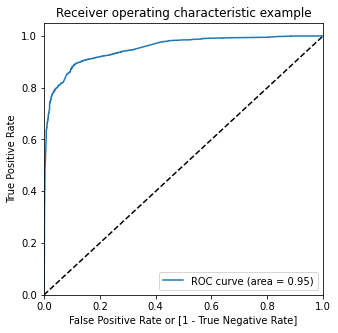

In [242]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [243]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.093874,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.053862,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.109412,3516,0,1,1,0,0,0,0,0,0,0,0
3,0,0.575020,8105,1,1,1,1,1,1,1,0,0,0,0
4,0,0.093874,3934,0,1,0,0,0,0,0,0,0,0,0


In [244]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.783859  0.945661  0.684158
0.2   0.2  0.865182  0.911192  0.836832
0.3   0.3  0.891156  0.887267  0.893553
0.4   0.4  0.891156  0.856448  0.912544
0.5   0.5  0.894712  0.801298  0.952274
0.6   0.6  0.896413  0.781833  0.967016
0.7   0.7  0.893012  0.761152  0.974263
0.8   0.8  0.888374  0.739659  0.980010
0.9   0.9  0.860390  0.650852  0.989505


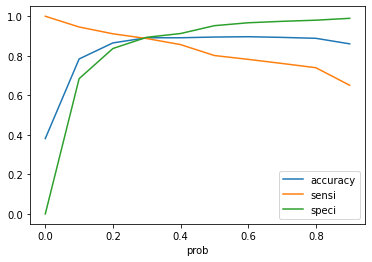

In [245]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [246]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.093874,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.053862,6795,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.109412,3516,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.575020,8105,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.093874,3934,0,1,0,0,0,0,0,0,0,0,0,0


In [247]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.891156462585034

In [248]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3576,  426],
       [ 278, 2188]])

In [249]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [250]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8872668288726683

In [251]:
# Let us calculate specificity
TN / float(TN+FP)

0.8935532233883059

In [252]:
# Calculate false postive rate - predicting conversion when lead has not have converted
print(FP/ float(TN+FP))

0.10644677661169415


In [253]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8370313695485846


In [254]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9278671510119356
